# !Python 3
# Data preparation



In [399]:
#The data dictionary and variable note can be found on kaggle.com/c/titanic

In [400]:
#To load and prepare the dataset
#importing all necessary packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.random as nr
import math
import plotly.express as px
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm


#To display graphics inline
%matplotlib inline

In [401]:
#load the dataset
titanic = pd.read_csv('train.csv', na_values=np.nan)
test = pd.read_csv('test.csv', na_values=np.nan)

print(titanic.shape)
print(test.shape)

(891, 12)
(418, 11)


In [402]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [403]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


'''the survival training dataframe has 891 rows and 12columns. 
Considering the unique PassengerId column shape, there seems to be no duplicate cases.

The datatype of each column is as represented below
PassengerId----An identifier
Survived-------categorical, Label
Pclass---------categorical
Name-----------
sex------------categorical, nominal
age------------numeric discrete
sibsp----------numeric discrete
parch----------numeric discrete
Ticket---------categorical 
Fare-----------numeric
Cabin ---------categorical
Embarked-------categorical '''

In [404]:
titanic.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

From the above,
titanic dataset: Age, cabin, embarked column has missing values
test dataset: Age, Cabin, fare has missing values.

In [405]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [406]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [407]:
print(titanic.PassengerId.unique().shape)
#We can conclude that there are no duplicate entries

(891,)


EXPLORATORY DATA ANALYSIS

In [408]:
#To get descriptive statistics for each of the numerical columns
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [409]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Observations
In Age column, mean> std. the data might be right skewed
In Fare column, there isnt much disparity between the two

Did some passenger actually paid zero fare or its a mistake?
The value range of the features are wide therfor we mighht need to scale the features


# To find and treat missing values
From observing the dataframe, I can see that missing values are coded as empty cells seen already as numpy nan.

The columns Age (177), cabin(687) and Embarked(2) have missing values

Replacing Embarked nan with the mode of the column
replacig Cabin nan with a new category called "Unknown" 
replacing missing columns in age depending on the salutation of the passenger: we see the salutations between the first comma and fullstop. so we can extract the string

In [410]:
titanic['Embarked'].fillna(value = titanic['Embarked'].mode()[0], inplace = True)

titanic['Cabin'].fillna(value = 'X', inplace = True)
test['Cabin'].fillna(value = 'X', inplace = True)

full_dataset = [titanic, test]
for dataset in full_dataset:
    dataset['Cabin'] = dataset['Cabin'].str.extract('([A-Za-z])', expand = False)

    
# test['Fare'].fillna(test.groupby('Pclass')['Fare'].median, inplace = True)
test['Fare'].fillna(test.groupby('Pclass')['Fare'].median, inplace = True)
test.isnull().sum(axis = 0)

#Now, want to fill missing values in Age with the median age depending on the persons Title
#so, we first extract the title from the name

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
dtype: int64

In [411]:
print(titanic["Cabin"].nunique())
print(test["Cabin"].nunique())


9
8


*Note that not all cabin categories is represented in the test dataframe!

In [412]:
full_dataset = [titanic, test]

for dataset in full_dataset:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)
    
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null object
Cabin          418 non-null object
Embarked       418 non-null object
Title          418 non-null object
dtypes: float64(1), int64(4), object(7)
memory usage: 39.3+ KB


In [413]:
#agreggating the title categories from 15 into 5
for dataset in full_dataset:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Others')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
titanic['Title'].value_counts()

# i doubt if the title column is useful, it might be tautology with the Sex column.
# i will rather not use it in my feature selection 

Mr        517
Miss      185
Mrs       126
Master     40
Others     23
Name: Title, dtype: int64

In [414]:

# title distribution
title_distr = titanic.groupby('Title').count()
print(title_distr)


        PassengerId  Survived  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  \
Title                                                                         
Master           40        40      40    40   40   36     40     40      40   
Miss            185       185     185   185  185  149    185    185     185   
Mr              517       517     517   517  517  398    517    517     517   
Mrs             126       126     126   126  126  109    126    126     126   
Others           23        23      23    23   23   22     23     23      23   

        Fare  Cabin  Embarked  
Title                          
Master    40     40        40  
Miss     185    185       185  
Mr       517    517       517  
Mrs      126    126       126  
Others    23     23        23  


In [415]:

# sex distribution
sex_distr = titanic.groupby('Sex').count()
print(sex_distr)

        PassengerId  Survived  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex                                                                            
female          314       314     314   314  261    314    314     314   314   
male            577       577     577   577  453    577    577     577   577   

        Cabin  Embarked  Title  
Sex                             
female    314       314    314  
male      577       577    577  


In [416]:
# take care of missing data in age column

for dataset in full_dataset:
    dataset['Age'] = dataset.groupby('Title')['Age'].apply(lambda x: x.fillna(x.mean()))
    dataset['Age'] = pd.to_numeric(dataset['Age'], errors ='ignore')
titanic.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
Title          891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null objec

In [417]:
titanic['Family'] = titanic['SibSp'] + titanic['Parch']
test['Family'] = test['SibSp'] + test['Parch']
titanic['Family'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family, dtype: int64

In [418]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

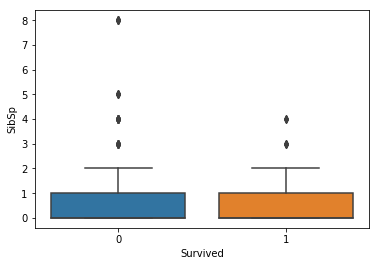

In [419]:
sns.boxplot(x = 'Survived', y = 'SibSp', data = titanic)

#The boxplt for survived and non survived is similar. Whether they travelled with sibling or spouse 
#SibSp may not be helpful to determine survival

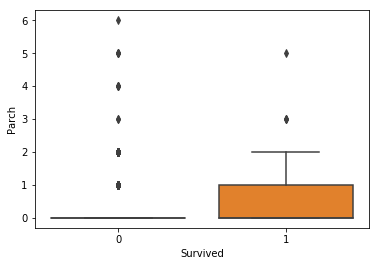

In [420]:
sns.boxplot(x = 'Survived', y = 'Parch', data = titanic)

#From the boxplot, i see that those that did not survive took no parch (on avg ), and those that took
#took up to 1 parch are seen to be outliers

# for those who survived, 50% of them had no parch while the rest had parch/ Also people with up to 3 
#were noted as outliers.

#My opinion: if parch = 1/2, survived; 
#Parch may be useful in determining survival

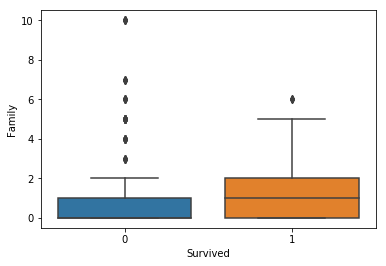

In [421]:
family_mapping = {0: int(0), 1: int(1), 2: int(2), 3: int(3), 4: int(4), 5: int(5), 6: int(6), 7: int(7), 10: int(10)}


for dataset in full_dataset:
    dataset['Family'] = [family_mapping[x] for x in dataset['Family']]
    dataset['Family'].value_counts()

titanic.nunique()
    
sns.boxplot(x = 'Survived', y = 'Family', data = titanic)


# half of the pple that did not survive have no family, others had: 
# pple that survived have median value of 1
# in other words, there is a great difference between those that survived n didnt, so therefore
# Family might be useful in determining survival

# I will leave family as a numerical feature

In [422]:
# WE model it using Family , After which i can also model using Parch. and see which is a better model
# i do not think SibSp may be useful much

In [423]:
#to reduce the dimension of the family column, we aggregat the valus
#where 0 is alone, 1 is between 1 to 3 fam memebers, 2 is bigger family i.e more than 3

# family_mapping = {0: int(0), 1: int(1), 2: int(1), 3: int(1), 4: int(1), 5: int(2), 6: int(2), 7: int(2), 10: int(2)}


# for dataset in full_dataset:
#     titanic['Family'] = [family_mapping[x] for x in titanic['Family']]
#     titanic['Family'].value_counts()
# titanic.nunique()

# sns.boxplot(x = 'Survived', y = 'Family', data = titanic)

In [424]:
# Drop columns that are not necessary fro the training
#i remove the sibsp and parch dataset since it has now been replaced with family 

titanic.drop('PassengerId', axis=1, inplace=True)
# test.drop('PassengerId', axis=1, inplace=True)


In [425]:
titanic.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

titanic.drop('Ticket', axis=1, inplace=True)
test.drop('Ticket', axis=1, inplace=True)



In [426]:
titanic.drop('Parch', axis=1, inplace=True)
# test.drop('Parch', axis=1, inplace=True)

In [427]:
titanic.drop('SibSp', axis=1, inplace=True)
test.drop('SibSp', axis=1, inplace=True)

titanic.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family
0,0,3,male,22.0,7.2500,X,S,Mr,1
1,1,1,female,38.0,71.2833,C,C,Mrs,1
2,1,3,female,26.0,7.9250,X,S,Miss,0
3,1,1,female,35.0,53.1000,C,S,Mrs,1
4,0,3,male,35.0,8.0500,X,S,Mr,0


In [428]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
Fare        891 non-null float64
Cabin       891 non-null object
Embarked    891 non-null object
Title       891 non-null object
Family      891 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 62.7+ KB


In [429]:
test.head()

,PassengerId,Pclass,Sex,Age,Parch,Fare,Cabin,Embarked,Title,Family
0,892,3,male,34.5,0,7.8292,X,Q,Mr,0
1,893,3,female,47.0,0,7,X,S,Mrs,1
2,894,2,male,62.0,0,9.6875,X,Q,Mr,0
3,895,3,male,27.0,0,8.6625,X,S,Mr,0
4,896,3,female,22.0,1,12.2875,X,S,Mrs,2


In [430]:
titanic['Fare'] = pd.to_numeric(titanic['Fare'])
test['Fare'] = pd.to_numeric(test['Fare'], errors ='coerce')
# test['Fare'].dtypes
test.dropna(axis = 0, inplace = True)
test.isnull().sum(axis = 0)


PassengerId    0
Pclass         0
Sex            0
Age            0
Parch          0
Fare           0
Cabin          0
Embarked       0
Title          0
Family         0
dtype: int64

In [431]:

test['Fare'] = test['Fare'].astype(str).astype(float)
# test['Fare'] = pd.to_numeric(test['Fare'], errors ='ignore')
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    417 non-null int64
Pclass         417 non-null int64
Sex            417 non-null object
Age            417 non-null float64
Parch          417 non-null int64
Fare           417 non-null float64
Cabin          417 non-null object
Embarked       417 non-null object
Title          417 non-null object
Family         417 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 35.8+ KB


In [432]:
# test['Age'] = pd.to_numeric(test['Age'], errors ='ignore')
titanic['Age'] = pd.to_numeric(titanic['Age'])
test['Age'] = pd.to_numeric(test['Age'], errors ='coerce')


In [433]:
test.info()
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    417 non-null int64
Pclass         417 non-null int64
Sex            417 non-null object
Age            417 non-null float64
Parch          417 non-null int64
Fare           417 non-null float64
Cabin          417 non-null object
Embarked       417 non-null object
Title          417 non-null object
Family         417 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 35.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
Fare        891 non-null float64
Cabin       891 non-null object
Embarked    891 non-null object
Title       891 non-null object
Family      891 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 62.7+ KB


In [434]:
test['Age'] = test['Age'].astype(str).astype(float)
titanic['Age'] = titanic['Age'].astype(str).astype(float)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    417 non-null int64
Pclass         417 non-null int64
Sex            417 non-null object
Age            417 non-null float64
Parch          417 non-null int64
Fare           417 non-null float64
Cabin          417 non-null object
Embarked       417 non-null object
Title          417 non-null object
Family         417 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 35.8+ KB


In [435]:
titanic.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [436]:
titanic.drop('Title', axis=1, inplace=True)
test.drop('Title', axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [437]:
test.head()

,PassengerId,Pclass,Sex,Age,Parch,Fare,Embarked,Family
0,892,3,male,34.5,0,7.8292,Q,0
1,893,3,female,47.0,0,7.0000,S,1
2,894,2,male,62.0,0,9.6875,Q,0
3,895,3,male,27.0,0,8.6625,S,0
4,896,3,female,22.0,1,12.2875,S,2


# Data Visualisation and EDA


In [438]:
num_colss = ['Age', 'Fare', 'Family']
cat_colss = ['Pclass', 'Sex', 'Cabin', 'Embarked', 'Survived']

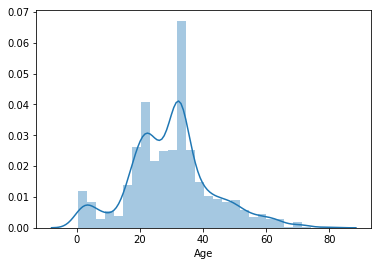

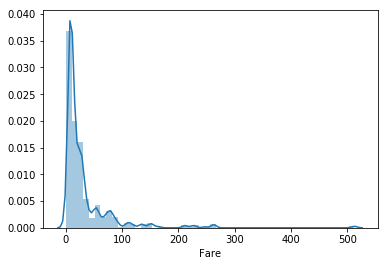

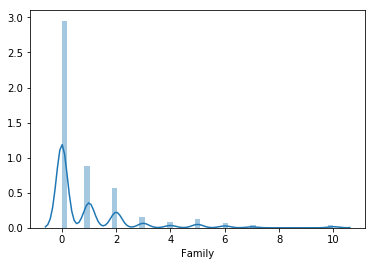

In [439]:
#DISTRIBUTION PLOTS OF A UNIVARIATE OBSERVATIONS
# sns.distplot(titanic['Fare'])

# this shows a distribution that is right skewed(median<mean) i.e the data is skwed by some high values.
for col in num_colss:
#     fare_norm = math.log(titanic['Fare'])
    plt.figure()
    sns.distplot(titanic[col], label="Skewness : %.1f"%(titanic[col].skew()))


Age is normally distributed while Fare is right skewed by some3 high values. Family is also right skewed.


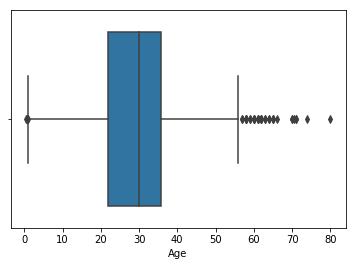

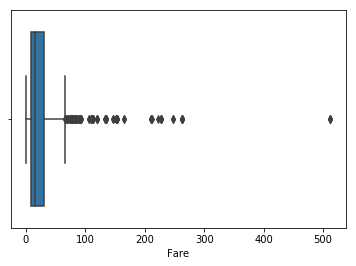

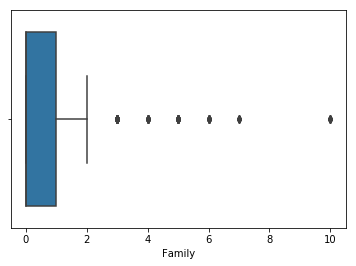

In [440]:
for col in num_colss:
#     fare_norm = math.log(titanic['Fare'])
    plt.figure()
    sns.boxplot(x = titanic[col])

This further reveaals to us that there are outliers with fare. the outliers in Age are not as pronounced.

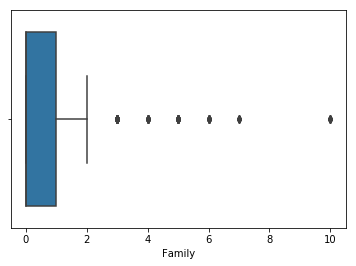

In [441]:
sns.boxplot(titanic['Family'])

ValueError: Could not interpret input 'Cabin'

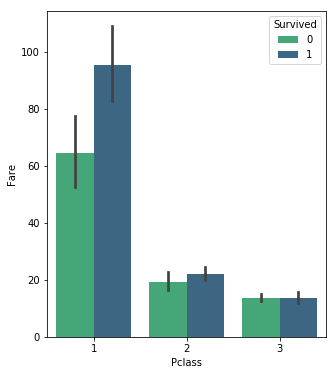

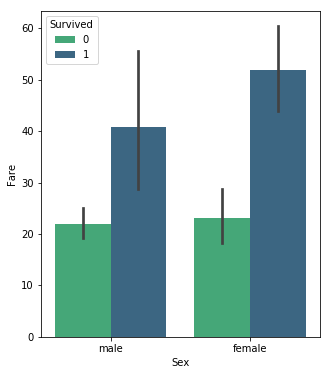

In [442]:
# BAR CHART OF THE  CATEGORICAL VARIABLES
for col in cat_colss:
    plt.figure(figsize=(5,6))
    sns.barplot(x = col, y = 'Fare', hue ='Survived', palette="viridis_r", data = titanic)

Generally from all plots, those who paid more had more chance at survival

From the first plot, 
+third class paid the least(as expected), but their survial rate is close to zero!

+first class paid more fare and had the highest survival rate; followed by second class
=the fare and Pclass may have played a role in survival

plot2
+generally, females have a higher survival rate compared to male.
+females and males that paid more fares had a higher chances of survival

*plot3
+B and C are kinda the most expensive cabins
+if you are in cabin A, B, F and you paid more fares, you are more likely to survive
+Nobody in cabin T survived?!
+the avg fare for survivors and non survivors in cabin c is equal. i.e in cabin C, the avg fare for survivor and not survivior is the same

plot4
+those who embarked at C paid more, whilee those who embarked at Q paid the least

*plot5
+There was an increased chances of survival forthose who paid more

I believe that hving Fare and PClass in our data is tautology, and one should be removed. this is because they point to the same thing and are just coded differently under differeent variable.
+from fare vs sex, on an average, females paid more for tfare

In [ ]:
for col in cat_colss:
    plt.figure(figsize=(5,5))
    sns.barplot(x = col, y = 'Age', hue ='Survived', palette="viridis_r", data = titanic)

generally from all the plots, the avg age of survivors is a little lower than that of nonsurvivors
1
on an average, people who are older took a first class
+Irrespective of Pclass, if you are less older in those classes, you have 

2.
on an average, the males were a bit older than the women
unlike men, females who survived have a higher avg age. this is quite different from the usual as seen in all the plots
3.
There were more younger people in cabin A

5.
on an avg, those who survived were a bit younger thsn those who did not

In [ ]:
# compare passenger class with fare
sns.boxplot(x = 'Pclass', y ='Fare', data = titanic)

In [ ]:
sns.boxplot(x = 'Sex', y ='Fare', data = titanic)

In [ ]:
sns.boxplot(x = 'Survived', y ='Fare', data = titanic)


In [ ]:
sns.boxplot(x = 'Survived', y ='Fare', data = titanic)

In [ ]:
sns.boxplot(x = 'Pclass', y ='Age', hue = 'Survived', data = titanic)

In [ ]:
fig, ax = plt.subplots(figsize = (5, 5))
ax.scatter(titanic['Age'], titanic['Fare'])
plt.show()

# no apparent relationship between age and fare

In [ ]:
# To examine for class imbalance of the label
survived_count = titanic['Survived'].value_counts()
survived_count

In [ ]:
for catcol in cat_colss:
    titanic[catcol].value_counts().plot(kind = 'bar')
#     titanic[catcol].value_counts().plot(kind = 'pie')
    plt.show()
 
'''
most passengers boarded 3rd class, with the remaining on 1st or 2nd Class
more males were on board than females
a large percentage were in X cabin. this features shows class imblance
most passengers boardeed from S then C and then Q
more people died than survived
'''

In [ ]:

sns.pairplot(data = titanic)

In [ ]:
titanic.hist(bins = 18, figsize=(20, 15))

In [ ]:
# Visualisations to understand which features are useful for class Separation
#first, to visaulise the separation quality of numeric features


In [ ]:
titanic.head(5)

62% not survived while 38% survived. There is an obvious class imbalance but not so signiicant

In [ ]:
# import plotly.express as px

# from plotly import __version__
# import cufflinks as cf
# import plotly.express as px
# # cufflinks connects plotly to pandas


# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)  #this connects the javascript to ur notebook
# cf.go_offline()


In [ ]:
# titanic.groupby(['Sex', 'Survived']).count()
# figure = px.bar(titanic, y = 'Sex', x = 'Age', orientation = 'h', color = 'Survived', barmode = 'group')
# figure.show()


### To examine for class imbalance of the label

In [ ]:
survi = titanic[['Sex', 'Survived']].groupby('Survived').count()
print(survi)

38% survived.there is a case of class imbalance in the label. we dont want this imbalance to bias our model.
we will treat it. later

### To find the log transformation of numeric variables

In [ ]:
titanic['LogFare'] = titanic['Fare'].map(lambda i: np.log(i) if i>0 else 0)
sns.distplot(titanic['LogFare'])

In [ ]:
test['LogFare'] = test['Fare'].map(lambda i: np.log(i) if i>0 else 0)
sns.distplot(test['LogFare'])

## Prepare Data for Scikit-learn Model

Note: Numpy arrays  not pd dataframe) are required for sklearn model

In [ ]:
# To creates a numpy array of the label values

labels = np.array(titanic['Survived'])

### To create the Numpy feature array (i.e model matrix)
#### Stage1: To record the categorical variables as binary dummy variables-
(1a)Encode the categorical string variables as integers (LABEL ENCODING).

Depending on what tose categorical feature represents(if there is hierarchy to the categories, we stop at label encoding. If there is no hierarchy, we go ahead and do ONE HOT ENCODING. 

(1b)Transform the integer coded variables to dummy variables.

(1c)Append each dummy coded categorical variable to the model matrix. 

In [ ]:
num_colss = ['Age', 'LogFare', 'Family']
cat_features = ['Pclass', 'Sex', 'Cabin', 'Embarked']


hierarchy exists with Pclass only

In [ ]:
def encode_string(cat_features):
    #We first encode the strings to numeric variables
    labelenc = preprocessing.LabelEncoder()
    labelenc.fit(cat_features)
    labelenc_cat_features = labelenc.transform(cat_features)
    
    #To apply one-hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(labelenc_cat_features.reshape(-1, 1)) 
    return encoded.transform(labelenc_cat_features.reshape(-1, 1)).toarray()

cat_features = ['Embarked']
# Note: I have dropped the Cabin feature, and will not be using it in my modelling. the metrics were the same whether i used or drop the feature

Features = encode_string(titanic['Sex'])

print(titanic['Sex'].unique())
for col in cat_features:
    temp = encode_string(titanic[col])
    Features = np.concatenate([Features, temp], axis = 1)
    
print(Features[:2, :])
print(Features.shape)

Next the numeric features will be concatenated to the numpy array by executing the code in the cell below

In [ ]:
Features = np.concatenate([Features, np.array(titanic[['Pclass', 'Family', 'LogFare', 'Age'
                                                      ]])], axis = 1)
print(Features[:2, :])
print(Features.shape)

In [ ]:
# For the test dataframe

def encode_string(cat_features):
    #We first encode the strings to numeric variables
    labelenc = preprocessing.LabelEncoder()
    labelenc.fit(cat_features)
    labelenc_cat_features = labelenc.transform(cat_features)
    
    #To apply one-hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(labelenc_cat_features.reshape(-1, 1)) 
    return encoded.transform(labelenc_cat_features.reshape(-1, 1)).toarray()

cat_features = ['Embarked']

Features_ = encode_string(test['Sex'])

print(test['Sex'].unique())
for col in cat_features:
    temp = encode_string(test[col])
    Features_ = np.concatenate([Features_, temp], axis = 1)
    
print(Features_[:2, :])
print(Features_.shape)


# Next the numeric features will be concatenated to the numpy array by executing the code in the cell below

Features_ = np.concatenate([Features_, np.array(test[['Pclass', 'Family', 'LogFare', 'Age'
                                                      ]])], axis = 1)
print(Features_[:2, :])
print(Features_.shape)


### Split the dataset

In [ ]:

# nr.seed(9988)
# indx = range(Features.shape[0])
# indx = ms.train_test_split(indx, test_size = 0.25)    #stratify = 'Survived'

# X_train = Features[indx[0],:]
# y_train = np.ravel(labels[indx[0]])
# X_val = Features[indx[1],:]
# y_val = np.ravel(labels[indx[1]])


In [ ]:
X_train, X_val, y_train, y_val = ms.train_test_split(Features, labels, test_size = 0.20, 
                                                     random_state = 712, stratify = labels)

### Scale the Numeric features (for train data only?)
For the Age column (it has a close to normal distriution), we use  Zscore staandardisation. the age column is the last column in the array. the 9th column


In [ ]:
print(X_val.shape)
print(X_train.shape)

scaler = preprocessing.StandardScaler().fit(X_train[:,8:])
X_train[:,8:] = scaler.transform(X_train[:,8:])
X_val[:,8:] = scaler.transform(X_val[:,8:])
X_train[:5,]

In [ ]:
print(Features_.shape)

# Scaling For the test dataframe
Features_[:,8:] = scaler.transform(Features_[:,8:])

Features_[:5,]

### Construct a Logistics Regression Model 

In [ ]:
logistic_mod = linear_model.LogisticRegression()
logistic_mod.fit(X_train, y_train)

#### Let us  now examine the model coefficients

In [ ]:
print(logistic_mod.intercept_)
print(logistic_mod.coef_)

##### Let us see the Output Probabilities for each class

Recall that the logistic regression model outputs probabilities for each class. The class with the highest probability is taken as the score (prediction).

To compute and display a sample of these class probabilities for the test feature set:

In [ ]:
probabilities = logistic_mod.predict_proba(X_val)
print(probabilities[:18, :])

The first column is the probability of a score of 00 and the second column is the probability of a score of 1

In [ ]:
# Predict and test with the test dataframe

probabilities_ = logistic_mod.predict_proba(Features_)
print(probabilities_[:18, :])

### Score the Classification Model 

Now that the class probabilities have been computed these values must be transformed into actual class scores.
I will set the thresholds between each likelihoods to be 0.5. The scores variable means the predictions

In [ ]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
    
scores = score_model(probabilities, 0.5)
print(np.array(scores[:30]))
print(y_val[:30])

In [443]:
# score for the test dataframe
#  We shall be uploading to kaggle to get scored

def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
    
scores_ = score_model(probabilities_, 0.5)
print(np.array(scores_[:30]))
# np.array(scores_[:])
scores_

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0]


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0,

In [444]:
# we create a csv to upload to kaggle
submission = pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived':scores_})
submission.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [447]:
submission.to_csv('Titanic_Predictions_1.csv', index = False)
print('Saved File successfullly!' )

Saved File successfullly


### Evaluate the Classification Model
1. Confusion matrix

In [ ]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score negative    Score positive')
    print('Actual negative    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual positive    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Negative      Positive')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_val, scores)    

POSITIVE == Survived(1)
NEGATIVE == Non-survived(0)

Many Non-survival cases were correctly classified (only 12 of 110 cases were wrongly classified)

Many survived cases were wrongly classified (16 of 53 cases were wrongly classified). i will say The survived cases are kinda poorly classified.

Thoughts: Depending on what is important to the client, can we change the threshold to increase the prediction of class of impoertance>? 

###### From the Precision, Recall and F1 score:

    *The positive cases have good scores, 
    *The negative cases have good scores too but not as good compared to the positive cases

### To compute the ROC Curve and AUC

In [ ]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_val, probabilities)    

AUC of 0.89 actually seems a good one, but we can still improve the model.

### To test on the file to be uploaded to kaggle

In [ ]:
probabilities = logistic_mod.predict_proba(X_val)
print(probabilities[:18, :])



### To Create a csv to Upload to Kaggle 